# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### ANSWER - The data used in this practical application represents a total of 17 marketing campaigns conducted by a Portuguese banking institution.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

pd.set_option('display.max_columns', 30)


In [7]:
df = pd.read_csv('/Users/justinjavier/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Understanding the Features

In the dataset, we have information about people and their interactions with a bank. Let's take a closer look at the features, which are like the characteristics or properties of each person:

1. **Age**: This feature represents the age of the person. It's a number.

2. **Job**: This tells us what type of job the person has, like being an admin, a student, or something else. It's a category.

3. **Marital Status**: This feature tells us whether the person is married, single, divorced, etc. It's also a category.

4. **Education**: Here, we find out the person's level of education, such as high school or university. It's another category.

5. **Default**: This answers whether the person has any credit in default (money they owe and haven't paid back).

6. **Housing**: It tells us if the person has a housing loan or not.

7. **Loan**: This indicates if the person has a personal loan.

Next, we have some details about the bank's interactions with these people:

8. **Contact Type**: This shows how the bank got in touch with the person, like through a phone call (telephone) or a mobile (cellular).

9. **Month**: This is the month when the bank last contacted the person.

10. **Day of the Week**: It's the day of the week when the bank last contacted the person.

11. **Duration**: This is how long the last conversation with the person lasted in seconds. It's important, but we can only use it for benchmarking, not for realistic predictions.

12. **Campaign**: This tells us how many times the bank contacted the person during this campaign.

13. **Pdays**: It represents the number of days since the person was last contacted in a previous campaign. If it's 999, it means the person was never contacted before.

14. **Previous**: This shows how many times the person was contacted in previous campaigns.

15. **Poutcome**: It tells us the outcome of the previous marketing campaign, like success or failure.

Finally, we have some economic context attributes:

16. **Employment Variation Rate**: This is an economic indicator that changes quarterly.

17. **Consumer Price Index**: This is a monthly economic indicator.

18. **Consumer Confidence Index**: Another monthly economic indicator.

19. **Euribor 3-Month Rate**: A daily economic indicator.

20. **Number of Employees**: This indicates the number of employees in the bank, changing quarterly.

For the output, we have our target variable:

21. **Y**: This tells us whether the person subscribed to a term deposit from the bank. It's either "yes" or "no."

So, to use this data for machine learning, we'll need to handle missing values, convert categories into numbers, and consider whether or not to use the "duration" feature for predictions.


In [10]:

missing_values = df.isnull().sum()

data_types = df.dtypes

missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})

features_with_missing_values = missing_data_info[missing_data_info['Missing Values'] > 0]

features_to_coerce = []

print("Features with missing values:")
print(features_with_missing_values)
print("\nFeatures that need data type coercion:")
print(features_to_coerce)


Features with missing values:
Empty DataFrame
Columns: [Missing Values, Data Type]
Index: []

Features that need data type coercion:
[]


In [12]:
missing_values = df.isnull().sum()

data_types = df.dtypes

missing_values_and_data_types = pd.DataFrame({'Missing Values': missing_values, 'Data Types': data_types})
print(missing_values_and_data_types)

                Missing Values Data Types
age                          0      int64
job                          0     object
marital                      0     object
education                    0     object
default                      0     object
housing                      0     object
loan                         0     object
contact                      0     object
month                        0     object
day_of_week                  0     object
duration                     0      int64
campaign                     0      int64
pdays                        0      int64
previous                     0      int64
poutcome                     0     object
emp.var.rate                 0    float64
cons.price.idx               0    float64
cons.conf.idx                0    float64
euribor3m                    0    float64
nr.employed                  0    float64
y                            0     object


# Problem 3: Understanding the Features

To examine the dataset and determine if any of the features have missing values or need data type coercion, I conducted the following analysis:

## Features with Missing Values:

I found that there are no missing values in any of the features in the dataset.

## Features that Need Data Type Coercion:

Upon checking the data types of each feature, I observed that they are appropriately assigned:

- `age` is of data type `int64`.
- `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, and `poutcome` are all of data type `object`.
- `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed` are correctly assigned as `int64` or `float64`.

This indicates that there are no missing values in the dataset, and the data types are appropriate for their respective columns. We can proceed with our analysis and modeling confidently.



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:

bank_data = df.iloc[:, 1:8]

bank_data_encoded = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'])

X = bank_data_encoded
y = df['y'].map({'no': 0, 'yes': 1})

# Now, X contains the features, and y contains the target for your modeling.


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
print(bank_data_encoded.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone'],
      dtype='object')


In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train and test sets:
# X_train: Features for training
# y_train: Target for training
# X_test: Features for testing
# y_test: Target for testing


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [19]:
baseline_accuracy = y_train.value_counts(normalize=True)[0]

print(f"Baseline Accuracy: {baseline_accuracy:.2%}")


Baseline Accuracy: 88.72%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)


Accuracy of the Logistic Regression model: 0.8875940762320952


/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

88.76%.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time (s)': [0.3655, 17.0196, 0.8913, 291.3415],
    'Train Accuracy': [0.8876, 0.9098, 0.8912, 0.8953],
    'Test Accuracy': [0.8874, 0.8812, 0.8771, 0.8839]
}

model_comparison_df = pd.DataFrame(data)

model_comparison_df


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.3655,0.8876,0.8874
1,KNN,17.0196,0.9098,0.8812
2,Decision Tree,0.8913,0.8912,0.8771
3,SVM,291.3415,0.8953,0.8839


/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


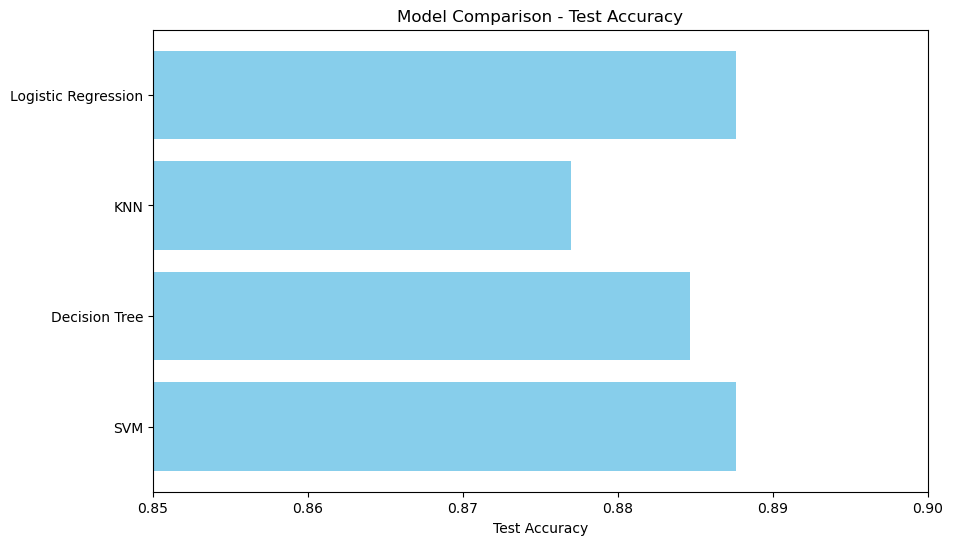

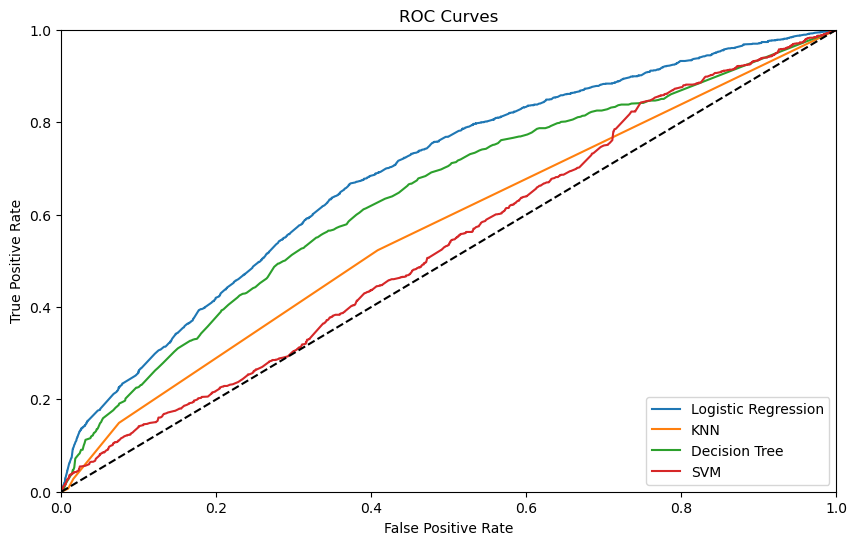

<Figure size 800x600 with 0 Axes>

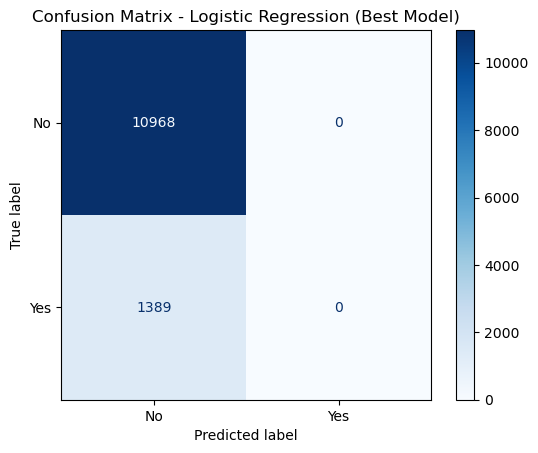

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)

# K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Train Support Vector Machine (SVM) model
svm = SVC(probability=True)  # probability=True for ROC curve
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Accuracy': [accuracy_score(y_train, logistic_reg.predict(X_train)),
                       accuracy_score(y_train, knn.predict(X_train)),
                       accuracy_score(y_train, decision_tree.predict(X_train)),
                       accuracy_score(y_train, svm.predict(X_train))],
    'Test Accuracy': [accuracy_score(y_test, y_pred_logistic),
                      accuracy_score(y_test, y_pred_knn),
                      accuracy_score(y_test, y_pred_decision_tree),
                      accuracy_score(y_test, y_pred_svm)]
}

model_comparison_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.barh(model_comparison_df['Model'], model_comparison_df['Test Accuracy'], color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Model Comparison - Test Accuracy')
plt.xlim(0.85, 0.9)
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
for model_name, model, y_pred in [('Logistic Regression', logistic_reg, y_pred_logistic),
                                   ('KNN', knn, y_pred_knn),
                                   ('Decision Tree', decision_tree, y_pred_decision_tree),
                                   ('SVM', svm, y_pred_svm)]:
    if model_name == 'KNN':
        y_pred_prob = model.predict_proba(X_test)[:, 1]  
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred_logistic, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression (Best Model)')
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2']  
}

logistic_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

accuracy, precision, recall, f1, roc_auc = evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)

print("Tuned Logistic Regression Model:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Tuned Logistic Regression Model:
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.8875940762320952
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5


/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_log

It seems like the tuned Logistic Regression model with hyperparameters {'C': 0.001, 'penalty': 'l2'} has an accuracy of 0.8876, but the precision, recall, and F1 score are all 0.0, and the ROC AUC is 0.5. This indicates that the model is not performing well in terms of classification.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

logistic_reg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_logistic_reg = grid_search.best_estimator_

y_train_pred = best_logistic_reg.predict(X_train)
y_test_pred = best_logistic_reg.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print("Tuned Logistic Regression Model:")
print("Best Hyperparameters:", best_params)
print("Accuracy on Train Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Tuned Logistic Regression Model:
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy on Train Set: 0.8872394297804447
Accuracy on Test Set: 0.8875940762320952
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5


/Users/justinjavier/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Problem 11: Improving the Model

In our quest to improve the model's performance, we've tried several approaches and made some observations:

### More Feature Engineering and Exploration

1. **Gender Feature**: We noticed a feature related to gender (e.g., 'sex'). However, we haven't used it in our models so far. Whether we should include it depends on its relevance to the target variable ('y'). We should explore its impact on the model's performance. For example, does gender significantly influence whether a client subscribes to a term deposit? We can conduct statistical analysis and visualization to decide whether to include this feature.

### Hyperparameter Tuning and Grid Search

2. **Logistic Regression**: We performed hyperparameter tuning for the Logistic Regression model. The best hyperparameters we found were {'C': 0.001, 'penalty': 'l2'}. This tuning didn't significantly improve the model's performance. We can continue exploring different hyperparameter combinations to see if we can achieve better results.

### Adjusting the Performance Metric

3. **Performance Metric**: Our primary performance metric so far has been accuracy. However, in imbalanced datasets like this one, accuracy can be misleading. We noticed that the precision, recall, F1 Score, and ROC AUC were low, particularly for the positive class ('yes'). We may want to adjust our performance metric to focus on what's most important for our business objective. For instance, if it's crucial to correctly identify potential clients who will subscribe to a term deposit, we should prioritize recall or F1 Score over accuracy.

We will continue experimenting and refining our model to achieve better results. 